In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train = pd.read_csv("./data/wine/train.csv")
test = pd.read_csv("./data/wine/test.csv")

In [15]:
train.head(20)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.80,0.042,9.0,84.0,0.99432,3.44,0.44,10.20,white
1,1,5,8.8,0.610,0.14,2.40,0.067,10.0,42.0,0.99690,3.19,0.59,9.50,red
2,2,5,7.9,0.210,0.39,2.00,0.057,21.0,138.0,0.99176,3.05,0.52,10.90,white
3,3,6,7.0,0.210,0.31,6.00,0.046,29.0,108.0,0.99390,3.26,0.50,10.80,white
4,4,6,7.8,0.400,0.26,9.50,0.059,32.0,178.0,0.99550,3.04,0.43,10.90,white
5,5,6,6.0,0.190,0.37,9.70,0.032,17.0,50.0,0.99320,3.08,0.66,12.00,white
6,6,5,6.1,0.220,0.49,1.50,0.051,18.0,87.0,0.99280,3.30,0.46,9.60,white
7,7,6,7.1,0.380,0.42,11.80,0.041,32.0,193.0,0.99624,3.04,0.49,10.00,white
8,8,5,6.8,0.240,0.31,18.30,0.046,40.0,142.0,1.00000,3.30,0.41,8.70,white
9,9,5,6.8,0.390,0.35,11.60,0.044,57.0,220.0,0.99775,3.07,0.53,9.30,white


In [8]:
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [10]:
train.isna().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

C:\Users\Playdata\AppData\Local\Temp\ipykernel_37664\914811446.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('alcohol').mean()['quality'].plot()


<AxesSubplot: xlabel='alcohol'>

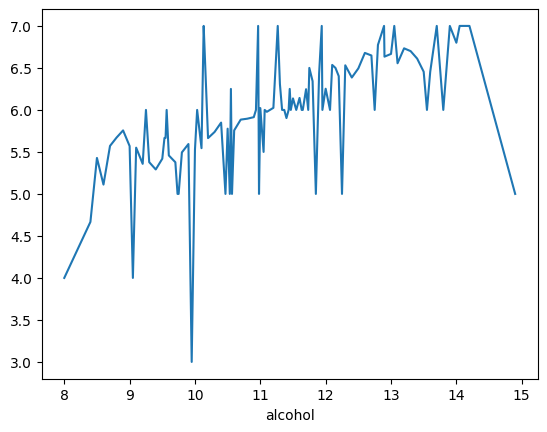

In [12]:
train.groupby('alcohol').mean()['quality'].plot()

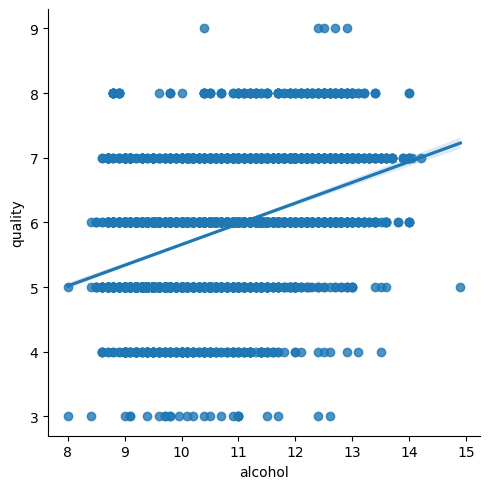

In [13]:
sns.lmplot(x = 'alcohol', y = 'quality', data = train)

<AxesSubplot: ylabel='alcohol'>

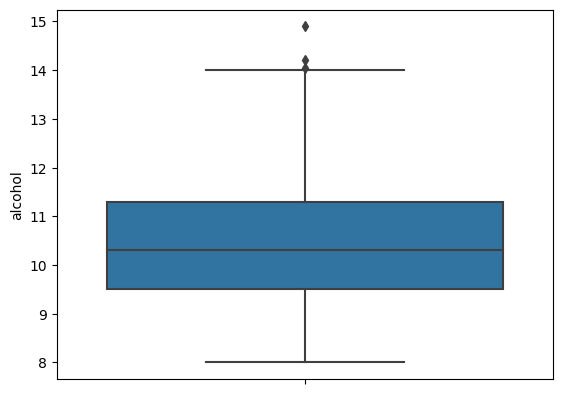

In [14]:
sns.boxplot(y=train['alcohol'], data=train)

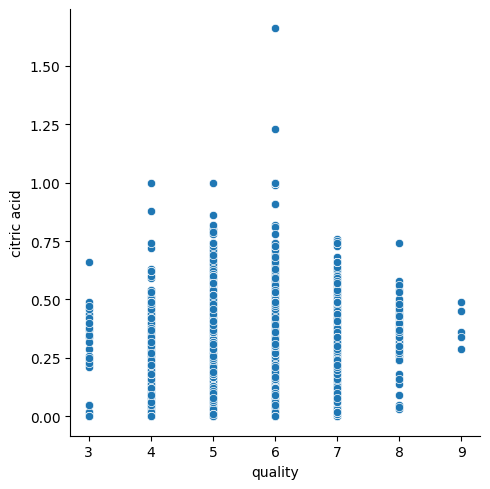

In [19]:
sns.relplot(data=train, x="quality", y="citric acid", kind="scatter")

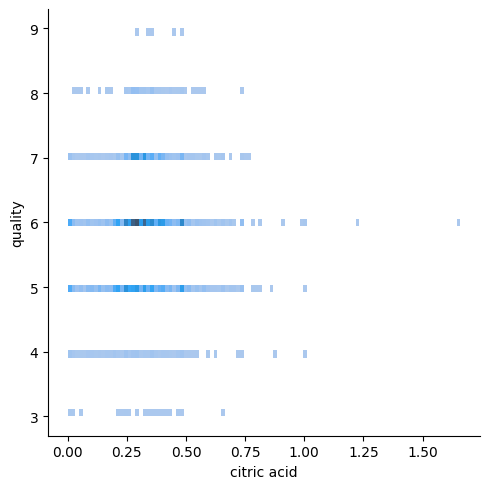

In [26]:
sns.displot(train, x="citric acid", y="quality")

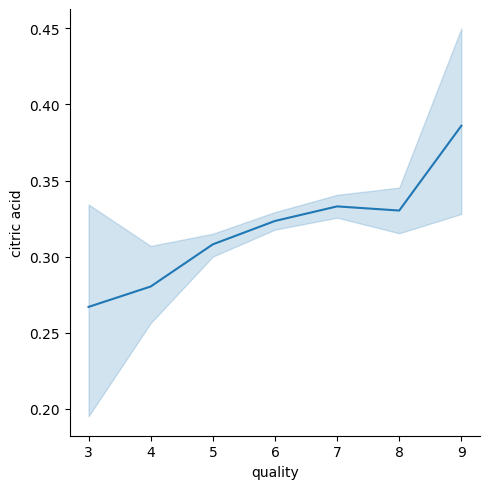

In [37]:
sns.relplot(
    data=train, kind="line",
    x="quality", y="citric acid"
)